In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

## 추론

###  카이제곱검정

In [2]:
# help(sp.stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

### 웹 전환률 차이에 대한 카이 제곱 검정 - 유의 수준을 5%으로 결정

In [12]:
# 데이터 가져오기
click_rate = pd.read_csv('python_statistics/data/click_rates.csv')
# print(click_rate)
clicks = click_rate.pivot(index = "Click", columns = 'Headline',
                          values = 'Rate')
# print(clicks)
# 전환율을 검정할 때는 각 컬럼의 이름은 페이지가 되고
# 첫 행이 클릭한 수가 되고 두 번째 행이 클릭하지 않은 수가 됩니다.
# 무료 유튜브 유저 같은 경우는 광고를 선택할 권한이 없기 때문에
# 직접 전환율 측정이 안되서 광고 후 설문 조사를 합니다.

result = sp.stats.chi2_contingency(clicks)
# print(result)
# print(result.pvalue)

if result.pvalue > 0.05 :
    print('귀무 가설을 기각할 수 없음 - 전환율의 차이가 없음')
    
else :
    print('귀무 가설을 기각할 수 있음 - 전환율의 차이가 있음')

귀무 가설을 기각할 수 없음 - 전환율의 차이가 없음


### 일원 카이 제곱 검정

In [16]:
data = np.array([41, 30, 51, 71, 61])
result = sp.stats.chisquare(data)
print(result.pvalue)

if result.pvalue > 0.01 :
    print("Can not reject H0 - there is no difference between preference")
else :
    print("Reject H0 - there is difference between preference")

0.00039991784008227264
Reject H0 - there is difference between preference


### 이원 카이 제곱 검정

In [17]:
# H_0 : 독립적이다

objs = np.array([np.array([2, 3]), np.array([4, 6])])
result = sp.stats.chi2_contingency(objs)
print(result)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[2., 3.],
       [4., 6.]]))


## Z 검정

### 단일 표본 Z 검정

In [49]:
# 실제로는 거의 수행하지 않아서 API는 없고 직접 구현해야함

# 샘플 데이터 추출
N = 1000
mu_0 = 0
np.random.seed(123710564)

# X~(0, 1) 10개 추출
x = sp.stats.norm(mu_0).rvs(N)
# print(x)

# z 통계량과 유의 확률을 리턴해주는 함수 구현

def ztest_1samp(x, sigma2 =1, mu =0) :
    z = (x.mean()- mu) / np.sqrt(sigma2/len(x))
    return z , 2 * sp.stats.norm().sf(np.abs(z))

result = ztest_1samp(x)
print(result)


(-0.04289365478932552, 0.9657863068417173)


## 비율 검정

In [28]:
from statsmodels.stats.proportion import proportions_ztest

r = proportions_ztest(count = 135, nobs = 150, value = 110/150)
print(r)

(6.80413817439772, 1.0165593635824276e-11)


## 정규성 검정

In [53]:
np.random.seed(1014)

N1 = 1000
x1 = sp.stats.norm(0, 1).rvs(N1)
# 정규분포를 따르는지 확인
print(sp.stats.shapiro(x1))

x2 = sp.stats.norm(0, 1).rvs(N1)
# 2개의 분포가 같은지 확인
print(sp.stats.ks_2samp(x1, x2))

ShapiroResult(statistic=0.9981880187988281, pvalue=0.37048768997192383)
KstestResult(statistic=0.041, pvalue=0.37012017606173, statistic_location=-0.943562770960075, statistic_sign=1)


## 머신러닝을 위한 numpy기본

### 데이터 유형

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()

# 이차원 배열이라서  iris.data 는 Matrix
print(iris.data.shape)
# 첫 번째 행의 붓꽃 데이터 - 배열이므로 Vector
print(iris.data[0, :])

(150, 4)
[5.1 3.5 1.4 0.2]


In [56]:
# 컬러 이미지 배열이 Tensor
from scipy import misc
img_rgb = misc.face()
print(img_rgb.shape) # 차원이 3개 - Tensor

(768, 1024, 3)


In [72]:
# 2차원을 3차원으로 늘리기
iris = load_iris()
print(iris.data.shape) # 현재 2차원
# 3번째 값으로 -1 또는 1을 넣어도 됌
# -1은 음수가 아니라 남은 부분을 다 배정..?
print(iris.data.reshape(iris.data.shape[0], iris.data.shape[1], -1).shape)

# 1차원으로 만들 때는 flatten이라는 메서드를 이용해도 되고reshape를 이용해도 가능
print(iris.data.reshape(iris.data.shape[0], iris.data.shape[1], -1).flatten().shape)

(150, 4)
(150, 4, 1)
(600,)


In [71]:
ar = np.array([[1, 2, 3],[4, 5, 6]])
print(ar)
print(ar.T)

# 대칭 행렬 - 전치를 해도 동일한 모양이 나오는 행렬
# 정방 행렬 - 행과 열의 개수가 같은 행렬
# 대칭 행렬은 정방 행렬에서만 가능
br = np.array([[1, 5, 6, 7], [5, 2, 8, 9], [6, 8, 3, 4],[7, 9, 10, 4]])
print(br)
print(br.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]
[[ 1  5  6  7]
 [ 5  2  8  9]
 [ 6  8  3  4]
 [ 7  9 10  4]]
[[ 1  5  6  7]
 [ 5  2  8  9]
 [ 6  8  3 10]
 [ 7  9  4  4]]


## 벡터 사이의 산술 연산

In [74]:
ar = np.array([1, 2, 3])
br = np.array([4, 5, 6])
cr = np.array([7, 8, 9, 10])

print(ar + br)
# 벡터의 차원이 1차원이므로 동일하지만 원소의 개수가 3개 와 4개로 달라서 에러
# print(ar + cr)

[5 7 9]


ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [75]:
x = 10 
# 이 연산은 x를 ar의 차원으로 복제를 해서 수행
# [1, 2, 3] + [10, 10, 10]

print(ar + x)

[11 12 13]


### 선형 가중 결합

In [77]:
l1 = 1
l2 = 2
l3 = -3

v1 = np.array([4.5, 1])
v2 = np.array([-4.5, -1])
v3 = np.array([1.5, 2])

print(l1 * v1 + l2 * v2 + l3 * v3)

[-9. -7.]


### 벡터의 내적

In [81]:
# 일차원 벡터의 내적
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# 내적 구하기 - 일차원 벡터의 경우는 데이터의 개수만 같으면 알아서 수행
print(np.dot(x, y))
print(x @ y)

# 이 경우는 이차원 배열이라서 첫번째 데이터의 개수와 두번째 데이터의 행의 개수가 
# 맞아야만 수행이 됩니다.
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

print(np.dot(x.T, y))
print(x.T @ y)

32
32
[[32]]
[[32]]


### 이미지 유사도 출력

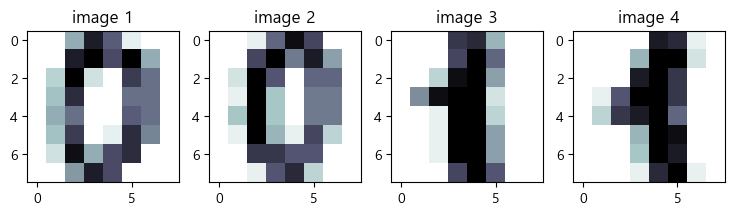

In [86]:
# 이미지 가져오기
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
# print(digits)

# 0번 이미지 가져오기
d1 = digits.images[0]
d2 = digits.images[10]

# 1번 이미지 가져오기
d3 = digits.images[1]
d4 = digits.images[11]

# 유사도 계산을 위해서 이미지의 shape를 조정
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

# 이미지를 출력
plt.figure(figsize = (9, 9))

# 이미지를 동일한 크기로 출력하기 위해서 영역을 설정
gs = gridspec.GridSpec(1, 4, height_ratios = [1], width_ratios=[9, 9, 9, 9])

for i in range(4) :
    plt.subplot(gs[i])
    plt.imshow(eval('d'+str(i+1)), aspect = 1,
              cmap = plt.cm.bone_r, interpolation = 'nearest')
    plt.grid(False)
    plt.title('image {}'.format(i+1))
    
plt.show()

In [ ]:
# 코사인 유사도 계산

# 동일한 이미지
print(v1.T @ v2)
print(v3.T @ v4)

# 다른 이미지
print(v1.T @ v3)
print(v2.T @ v4)
# 드라마틱하게 크지는 않네..? ㅎㅎ

## 머신러닝 프로젝트

### 데이터 표현 방식

In [97]:
# 데이터 가져오기
import seaborn as sns
iris = sns.load_dataset('iris')
# iris.head()

# 이 데이터는 sepal_length, sepal_width, petal_length, petal_width 를 가지고
# species 를 분류하기 위한 데이터
# species는 타겟 데이터이고 나머지 데이터는 특징 행렬

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

### Sklearn 의 추정기 사용

(50,)
(50, 1)
LinearRegression()
회귀 계수 : [1.978]
절편 : -0.9033107255311164


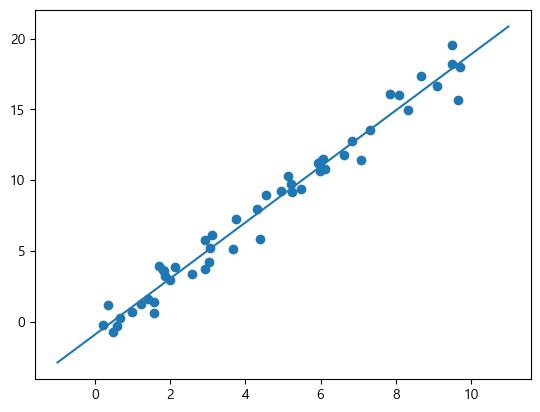

In [104]:
# 샘플 데이터 생성
rng = np.random.RandomState(42)

#데이터를 50개 생성
x = 10 * rng.rand(50)
# 데이터를 이용해서 타겟 데이터를 생성 - rng.randn(50)은 잡음
y = 2 * x - 1 + rng.randn(50)

# x 데이터를 특징 행렬로 변환
print(x.shape) # 1차원 배열 - 특성 배열은 2차원 배열, DataFrame, 희소 행렬
X = x.reshape(x.shape[0], -1) # x[:, np.newaxis] 로도 가능
print(X.shape) # X 는 특성 배열이 된 것

# 추정기 인스턴스를 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression (fit_intercept = True)
print(model)

# 기존 데이터를 가지고 훈련
model.fit(X, y)

# 훈련 결과를 확인 - 스스로 만든 파라미터나 결과에는 _가 붙습니다.
# 하이퍼 파라미터에는 _가 붙지 않습니다.
print('회귀 계수 :', model.coef_)
print('절편 :', model.intercept_)

# 회귀는 지도 학습 : predict 함수로 예측
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# 시각화
plt.scatter(x, y)
plt.plot(xfit, yfit)


## 캘리포니아 주택 데이터셋 이용한 가격 탐지..??

In [106]:
# 데이터 가져오기
housing = pd.read_csv('data_ML/housing.csv')
# housing.head()
housing.info() 
# total_bedrooms 결측치 존재
# ocean_proximity은 자료형이 객체 - 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [107]:
# 문자열 컬럼은 범주형인이 확인 - value_counts이용
housing['ocean_proximity'].value_counts()
# 5개 종류인 걸로 봐서 범주형

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [108]:
# 숫자 데이터의 범위 확인 - describe()을 이용
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


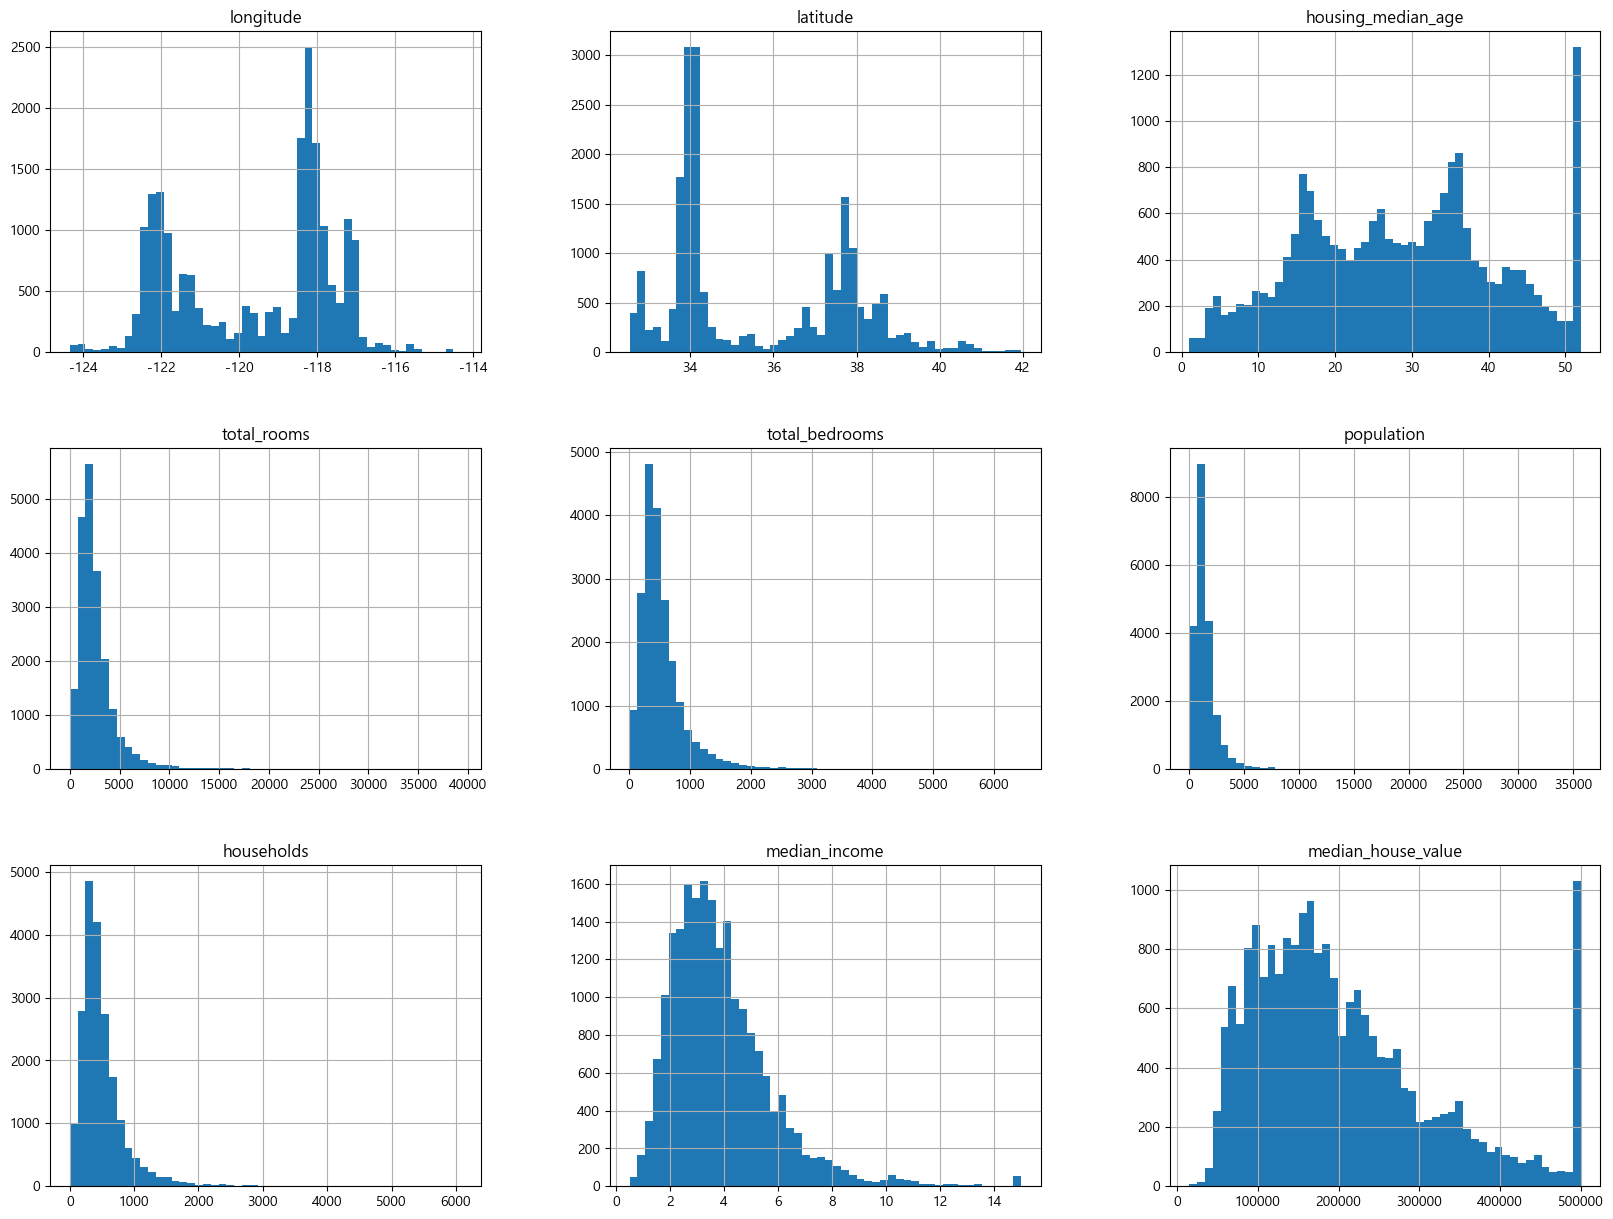

In [109]:
# 숫자 데이터의 경우는 분포를 확인 -히스토그램 생성
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

# 데이터의 분포가 한쪽으로 몰린 경우에는 데이터 분포를 조금 더 중앙에 많이
# 몰리도록 수정을 할 필요가 있음
# 로그 변환등을 이용
# 좌우로 너무 넓게 펄쳐져있는 경우 극단치를 제거하는 것에 대해 고려
# 각 숫자 데이터의 범위를 비교해서 범위 차이가 크면 스케일링 고려

### 데이터 분리

In [1]:
import sklearn
help(sklearn.model_selection.train_test_split)
# arrays 는데이터의 비율
# test_size는 테스트 데이터의 비율
# train_size는 훈련 데이터의 비율로 test_size를 설정하면 설정하지 않습니다.
# 데이터가 아주 많으면 훈련하는데 시간이 너무 많이 걸릴 수 있어서 설정하기도 합니다.
# random_state 는 시드 번호로 설정하느 것을 권장
# shuffle 은 데이터를 섞을 지 여부로 random_state 를 설정하면 무의미
# stratify 는 층화추출을 하고자 할떄 데이터의 비율

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [113]:
# 8:2로 train, test 분할
train_set, test_set = sklearn.model_selection.train_test_split(housing,
                                                              test_size = .2,
                                                              random_state = 42)
# 분할된 데이터의 차원 확인
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


In [119]:
# 타겟과 특성 행렬을 분리
X = housing.drop('median_house_value', axis =1)
y = housing['median_house_value']

result = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)
# print(len(result[0])) # X의 train
# print(len(result[1])) # X의 test
# print(len(result[2])) # y의 train
# print(len(result[3])) # y의 test

In [122]:
# 이렇게 받아오쟈
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.2,
                                                                            random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128, 9)
